In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline

In [182]:
import sys
sys.path.append("../")

In [183]:
import PoissonProcessClasses as PP
import imp
imp.reload(PP)

<module 'PoissonProcessClasses' from '../PoissonProcessClasses.py'>

In [184]:
N = 100# number of observations 
d = 2 # number of covariates

The intensity is $\theta * X$ where $X$ is a row vector.

In [185]:
theta = np.array([2,-1])

We consider different shapes for the intensity: random, constant,sinusoidal:

In [186]:
#X = 0.1*np.random.normal(size = (d,N))
#X = np.reshape(np.ones(N,),(1,N))
#X = np.reshape(np.sin(np.arange(N)),(1,N))
X = np.vstack((np.reshape(np.ones(N,),(1,N)),np.reshape(np.sin(np.arange(N)),(1,N))))
X.shape

(2, 100)

In [187]:
dt = 0.01 # discretization step

In [188]:
l = np.exp(np.dot(X.T,theta))

In [189]:
u = np.random.uniform(size = len(l))
y = 1*(l*dt>u)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [190]:
model = PP.PPModel(X,dt = dt)

In [191]:
res = model.fit(y)

/Users/val/anaconda/lib/python3.4/site-packages/scipy/optimize/_minimize.py:362: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  RuntimeWarning)


In [192]:
print('The estimated parameter is '+ str(res.x)+ '. The true parameter is '+str(theta)+'.')

The estimated parameter is [ 2.12872751 -0.85915756]. The true parameter is [ 2 -1].


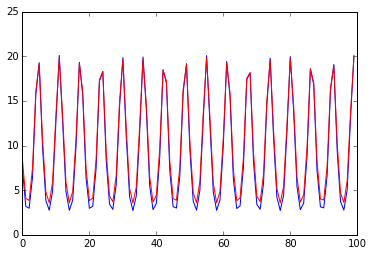

In [196]:
plt.plot(l)
plt.hold(True)
plt.plot(np.exp(np.dot(X.T,res.x)),'r')